<a href="https://colab.research.google.com/github/nattntn/7-14yrs_EffNet/blob/main/Transfer_with_Age%20/%20Test%20/%207_14_12_Eff_Regress_Predict_Freeze_250_Unflipped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [1]:
import pandas as pd
import numpy as np

In [2]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Clone Efficient

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


# Load model

In [4]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(7-14)/12_Re_1e-5_250_Freeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [5]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(7-14)/12_Re_1e-5_250_Freeze.h5')
height = width = model.input_shape[1]

#Prepare Data

In [6]:
train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(7-14)/table_train_7_14_fold.csv')
train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10
...,...,...,...,...,...,...,...,...
1828,1828,14,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,YY69.jpg,6
1829,1829,14,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y231.jpg,9
1830,1830,14,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y286.jpg,1
1831,1831,14,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y309.jpg,3


In [7]:
train = train.iloc[:,1:]

In [8]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Normal
/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test


In [9]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      # horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Age(year)',
        class_mode = 'raw',
        color_mode= 'rgb',
        target_size=(height, width), # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)

#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 1833 validated image filenames.


In [10]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(7-14)/table_test_7_14_Age.csv')
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg
...,...,...,...,...,...,...,...
387,387,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg
388,388,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg
389,389,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg
390,390,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg


In [11]:
test = test.iloc[:,1:]
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg
...,...,...,...,...,...,...
387,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg
388,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg
389,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg
390,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg


# Predict

In [12]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [14]:
predict_image(path[0])[0]

1/1 [==============================] - 10s 10s/step


8.177304

In [15]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 46ms/step


In [16]:
pred_list

[8.177304,
 7.8514276,
 8.208253,
 7.9751196,
 7.731462,
 7.429344,
 6.9600143,
 6.851588,
 6.887486,
 7.572232,
 7.2999463,
 8.107413,
 7.9013934,
 6.5240026,
 7.663239,
 8.687665,
 8.466307,
 8.793215,
 7.661924,
 7.0061536,
 7.9343534,
 8.216319,
 7.9415207,
 7.4882793,
 7.4565387,
 7.953173,
 7.60702,
 6.9247985,
 7.269296,
 7.5892444,
 7.3374453,
 8.299876,
 8.217337,
 7.6117263,
 8.4686165,
 7.0026207,
 7.8562407,
 7.8632293,
 7.668157,
 7.8094015,
 7.7029624,
 6.9308934,
 7.6082196,
 8.487064,
 7.607167,
 7.5952153,
 7.122064,
 7.749738,
 7.9096613,
 9.582613,
 9.011816,
 8.81835,
 8.378876,
 8.979716,
 9.146728,
 8.149361,
 8.719439,
 7.922232,
 8.294531,
 7.882448,
 8.0196295,
 8.139279,
 8.993225,
 8.793455,
 9.190836,
 9.2067795,
 8.708575,
 8.611279,
 8.805219,
 7.8500266,
 7.622531,
 8.615606,
 8.674691,
 7.631063,
 7.3014865,
 8.431011,
 8.912749,
 8.437254,
 8.54114,
 8.431011,
 8.912749,
 8.05515,
 7.826811,
 8.38289,
 8.066686,
 8.598515,
 8.920248,
 7.529561,
 8.30677

In [17]:
print(type(pred_list))

<class 'list'>


In [18]:
pred_int = np.around(pred_list)

In [19]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [20]:
pred

array([ 8.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  7.,  8.,  7.,  8.,  8.,
        7.,  8.,  9.,  8.,  9.,  8.,  7.,  8.,  8.,  8.,  7.,  7.,  8.,
        8.,  7.,  7.,  8.,  7.,  8.,  8.,  8.,  8.,  7.,  8.,  8.,  8.,
        8.,  8.,  7.,  8.,  8.,  8.,  8.,  7.,  8.,  8., 10.,  9.,  9.,
        8.,  9.,  9.,  8.,  9.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  8.,  8.,  9.,  9.,  8.,  7.,  8.,  9.,  8.,
        9.,  8.,  9.,  8.,  8.,  8.,  8.,  9.,  9.,  8.,  8.,  9.,  8.,
        9.,  9.,  8., 10., 11.,  9.,  8., 10., 10.,  9.,  9.,  9., 10.,
        9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        8.,  9.,  9.,  9.,  9.,  9.,  8.,  9.,  8.,  9.,  9.,  9.,  9.,
        9.,  8.,  9.,  9.,  9.,  9.,  9.,  8.,  9.,  8.,  9., 10., 10.,
        9.,  9., 10., 10., 10., 10.,  9.,  9., 10.,  9.,  8.,  8., 10.,
        9.,  8.,  8., 10., 10., 11., 10., 10., 10., 10.,  9., 10.,  8.,
        8.,  9.,  9.,  8.,  9., 10., 10.,  9.,  8.,  8.,  8., 10

#confusion_matrix

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 39.03061224489796%
              precision    recall  f1-score   support

           7       0.94      0.32      0.48        50
           8       0.32      0.50      0.39        48
           9       0.43      0.72      0.54        50
          10       0.34      0.45      0.39        49
          11       0.37      0.34      0.35        50
          12       0.31      0.42      0.35        48
          13       0.40      0.32      0.36        50
          14       1.00      0.04      0.08        47

    accuracy                           0.39       392
   macro avg       0.51      0.39      0.37       392
weighted avg       0.51      0.39      0.37       392



Text(0.5, 76.24999999999999, 'Predicted label')

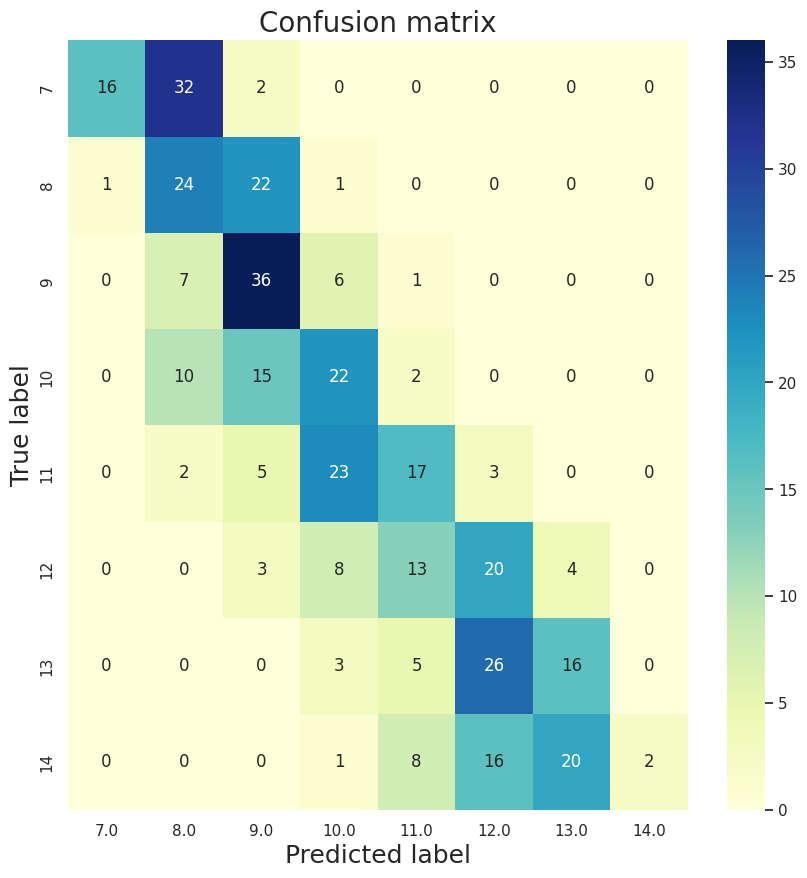

In [22]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#MSE and MAE

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.8214285714285714
MSE: 1.3418367346938775
RMSE: 1.158376767159061


In [24]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act, pred, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act, pred, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act, pred, multioutput= 'variance_weighted'))

R-squared: 0.742892484488159
R-squared: [0.74289248]
R-squared: 0.742892484488159
